In [46]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
# Load the "tips" dataset from seaborn
df=sns.load_dataset('tips')

In [5]:
#Perform EDA Exploratory Data Analysis
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
# Get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
# Here we can see the data of sex, smoker, day, time is 
# Categoricat data 

In [7]:
#Generate Summary statistics of numerical variable
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [8]:
#Here we can see in numerical variable Total_Bill Tip Size is numerical
# Data count , mean of the  data , std of the data, min of the data

In [8]:
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [9]:
# Count the occurrence of each day
df['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [11]:
# Total days we can count sat=87 days , sun=76 days, thur=62days
# Fri=19 Days in this Tips data 

In [12]:
# Data Preprocessing , Here we are going to divide in input and 
# Target Data In every month which persion how much gives tips 
# so our target is total amount of tips values and other is our 
# input which based we can find which days which persion gives how 
# much tips amoount.

In [4]:
X=df.drop(['tip'], axis=1) # axis =1 input features drop column of tip intead of rows 
y=df['tip'] # Target Variable

In [12]:
X , y

(     total_bill     sex smoker   day    time  size
 0         16.99  Female     No   Sun  Dinner     2
 1         10.34    Male     No   Sun  Dinner     3
 2         21.01    Male     No   Sun  Dinner     3
 3         23.68    Male     No   Sun  Dinner     2
 4         24.59  Female     No   Sun  Dinner     4
 ..          ...     ...    ...   ...     ...   ...
 239       29.03    Male     No   Sat  Dinner     3
 240       27.18  Female    Yes   Sat  Dinner     2
 241       22.67    Male    Yes   Sat  Dinner     2
 242       17.82    Male     No   Sat  Dinner     2
 243       18.78  Female     No  Thur  Dinner     2
 
 [244 rows x 6 columns],
 0      1.01
 1      1.66
 2      3.50
 3      3.31
 4      3.61
        ... 
 239    5.92
 240    2.00
 241    2.00
 242    1.75
 243    3.00
 Name: tip, Length: 244, dtype: float64)

In [16]:
# We can see here data is divided in to two parts input is all data except tip data

In [5]:
# Now we can see in the input data some column is categorical so we 
# need to convert categorical in to numerical data 
X_encoded=pd.get_dummies(X)

In [6]:
X_encoded.head(3)

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,2,0,1,0,1,0,0,0,1,0,1
1,10.34,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3,1,0,0,1,0,0,0,1,0,1


In [19]:
# Now we can see here all data convert in to all categorical to numerical data 

In [7]:
# Now Split data in to Training and testing data sets 
X_train,X_test,y_train,y_test=train_test_split(X_encoded, y ,test_size=0.2, random_state=42)

In [16]:
X_train.head(3)

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
228,13.28,2,1,0,0,1,0,0,1,0,0,1
208,24.27,2,1,0,1,0,0,0,1,0,0,1
96,27.28,2,1,0,1,0,0,1,0,0,0,1


In [17]:
X_test.head(3)

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
24,19.82,2,1,0,0,1,0,0,1,0,0,1
6,8.77,2,1,0,0,1,0,0,0,1,0,1
153,24.55,4,1,0,0,1,0,0,0,1,0,1


In [18]:
y_train.head(3)

228    2.72
208    2.03
96     4.00
Name: tip, dtype: float64

In [19]:
y_test.head(3)

24     3.18
6      2.00
153    2.00
Name: tip, dtype: float64

In [8]:
# Model Training
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [9]:
#Model Evaluation
y_pred=model.predict(X_test)

In [22]:
y_pred

array([2.91436632, 2.00292613, 3.96425583, 3.76380832, 2.14836306,
       2.67423448, 3.63934628, 2.29147245, 2.57207155, 2.45851225,
       2.90446763, 2.0573337 , 2.11817193, 2.35130838, 1.82976215,
       3.10830675, 2.95140176, 3.21602976, 2.56640892, 5.73957295,
       3.43490366, 3.22645102, 2.17139823, 1.94180002, 3.16394533,
       2.24547894, 2.14497574, 3.21025435, 3.20097595, 6.66803147,
       5.01111235, 1.57804024, 3.1909877 , 2.76652194, 2.98412862,
       3.85695724, 2.17008741, 5.46673999, 2.35586827, 2.99190732,
       2.03271177, 2.48465991, 3.44046814, 2.35532237, 1.92528104,
       0.87348926, 1.81911521, 3.04083954, 1.85436902])

In [10]:
mse=mean_squared_error(y_test,y_pred)

In [24]:
mse

0.7033566017436105

In [11]:
from sklearn.metrics import r2_score

In [12]:
r2=r2_score(y_test,y_pred)

In [27]:
r2

0.43730181943482505

In [13]:
# Model Deployment & Prediction
new_data=X_encoded.sample(5) # Sample 5 rows from the dataset

In [14]:
new_data

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
203,16.40,2,0,1,1,0,1,0,0,0,1,0
170,50.81,3,1,0,1,0,0,0,1,0,0,1
128,11.38,2,0,1,0,1,1,0,0,0,1,0
38,18.69,3,1,0,0,1,0,0,1,0,0,1
205,16.47,3,0,1,1,0,1,0,0,0,1,0


In [15]:
prediction=model.predict(new_data)

In [31]:
prediction

array([2.15286765, 1.94263423, 2.46128155, 2.14497574, 2.93666983])

In [16]:
import pickle
with open('model.pkl','wb') as file:
    pickle.dump(model,file)

In [17]:
with open('model.pkl','rb') as file:
    loaded_model=pickle.load(file)

In [49]:
loaded_model

LinearRegression()

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
param_grid={'fit_intercept':[True, False]}

In [48]:
grid_search=GridSearchCV(model,param_grid,cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]})

In [22]:
#Get the best model and its hyperparameters
best_model=grid_search.best_estimator_
best_params=grid_search.best_params_

In [47]:
best_model

LinearRegression()

In [24]:
best_params

{'fit_intercept': True}

In [25]:
# Evaluate the tuned model
y_pred_tuned=best_model.predict(X_test)

In [56]:
y_pred_tuned

array([2.91436632, 2.00292613, 3.96425583, 3.76380832, 2.14836306,
       2.67423448, 3.63934628, 2.29147245, 2.57207155, 2.45851225,
       2.90446763, 2.0573337 , 2.11817193, 2.35130838, 1.82976215,
       3.10830675, 2.95140176, 3.21602976, 2.56640892, 5.73957295,
       3.43490366, 3.22645102, 2.17139823, 1.94180002, 3.16394533,
       2.24547894, 2.14497574, 3.21025435, 3.20097595, 6.66803147,
       5.01111235, 1.57804024, 3.1909877 , 2.76652194, 2.98412862,
       3.85695724, 2.17008741, 5.46673999, 2.35586827, 2.99190732,
       2.03271177, 2.48465991, 3.44046814, 2.35532237, 1.92528104,
       0.87348926, 1.81911521, 3.04083954, 1.85436902])

In [26]:
mse_tuned=mean_squared_error(y_test,y_pred_tuned)

In [27]:
mse_tuned

0.7033566017436105

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [37]:
rmse=np.sqrt(mean_squared_error(y_test, y_pred))

In [35]:
rmse

0.838663580790063

In [38]:
mae=mean_absolute_error(y_test,y_pred)

In [39]:
mae

0.6671331480264893

In [40]:
mse=mean_squared_error(y_test,y_pred)

In [41]:
mse

0.7033566017436105

In [52]:
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [54]:
X=df[['total_bill']] # Input Features
y=df['tip'] # Target Variable

In [55]:
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [56]:
# Make Predictions
predictions=model.predict(X)

In [57]:
predictions

array([2.70463616, 2.00622312, 3.12683472, 3.40725019, 3.5028225 ,
       3.57633966, 1.84133463, 3.74332864, 2.49983836, 2.47253198,
       1.99887141, 4.6234341 , 2.53974767, 2.85587147, 2.47778321,
       3.1866987 , 2.00517288, 2.631119  , 2.70253567, 3.0890259 ,
       2.80230897, 3.05121707, 2.57650625, 5.06033609, 3.00185555,
       2.79075627, 2.32444741, 2.25303074, 3.19930164, 2.98400138,
       1.92325375, 2.84746951, 2.50193885, 3.09322688, 2.78760553,
       3.4471595 , 2.63321949, 2.69833469, 2.88317784, 4.20438627,
       2.60486287, 2.75399769, 2.38431139, 1.93690694, 4.11301494,
       2.84116804, 3.25496464, 4.32306398, 3.91871958, 2.81491191,
       2.23727706, 2.0009719 , 4.57617306, 1.96421332, 3.60469628,
       2.96719746, 4.91225152, 3.69396712, 2.10074519, 5.98980307,
       3.05121707, 2.3706582 , 2.0776398 , 2.84116804, 2.76765087,
       3.02916192, 2.64792292, 1.24269488, 3.0449156 , 2.49668762,
       2.18266431, 2.71303813, 3.74122815, 3.57528941, 2.46728

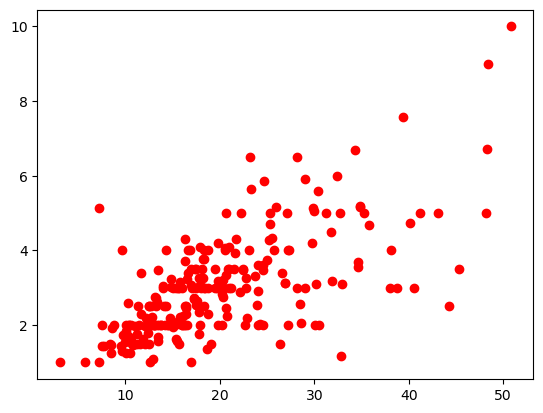

In [58]:
# Visulization the results
plt.scatter(X,y,color='red',label='Actual')
# We can see Scatter Plot of actual Data Points

Text(0.5, 1.0, 'Linear Regression Model-Tips Data')

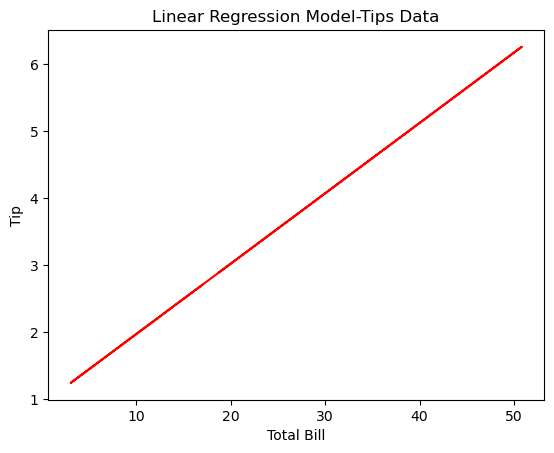

In [60]:
plt.plot(X,predictions,color='red',label='Predicted') # Line Plot for Predicted Value
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Linear Regression Model-Tips Data')

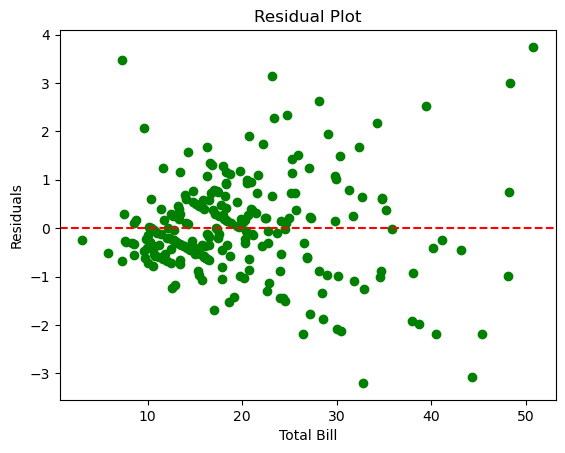

In [61]:
residuals = y - predictions
plt.scatter(X, residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Total Bill')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
# we can see diffrence b/w the actual and predicted  values

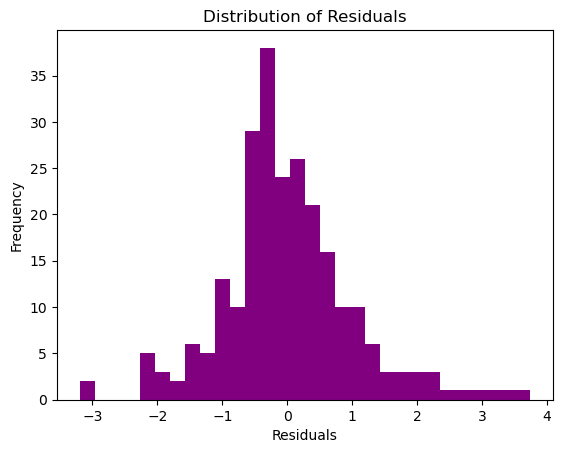

In [62]:
plt.hist(residuals, bins=30, color='purple')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

In [ ]:
# We can see here distribution of the residual. it check if the residual 
# follow a normal distribution or if there are any significant deviation

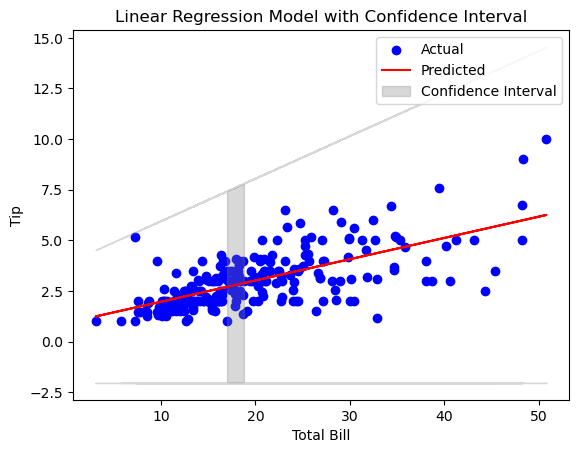

In [65]:
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, predictions, color='red', label='Predicted')
confidence_interval = model.predict(X) + 2 * residuals.std()  # Adjust the confidence level as needed
plt.fill_between(X.squeeze(), (predictions - confidence_interval).squeeze(), (predictions + confidence_interval).squeeze(), color='gray', alpha=0.3, label='Confidence Interval')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Linear Regression Model with Confidence Interval')
plt.legend()
plt.show()

In [ ]:
#This plot illustrates the regression line along with a confidence interval.
#The confidence interval provides an estimate of the uncertainty in the predicted values.